In [1]:
##### LVQ 2 #####

from sklearn import datasets
from neupy import algorithms, environment

In [2]:
environment.reproducible()

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as nm

In [29]:
def plot_scattermatrix(data, target):
    df = pd.DataFrame(data)
    df['target'] = target
    return sns.pairplot(df, hue='target')

In [4]:
dataset = pd.read_csv("/Users/namrata/Documents/Notes/ANN/DR Dataset.csv", delimiter = ",")
print(dataset)

      quality-assessment  pre-screening-result  MAD-1  MAD-2  MAD-3  MAD-4  \
0                      1                     1     22     22     22     19   
1                      1                     1     24     24     22     18   
2                      1                     1     62     60     59     54   
3                      1                     1     55     53     53     50   
4                      1                     1     44     44     44     41   
5                      1                     1     44     43     41     41   
6                      1                     0     29     29     29     27   
7                      1                     1      6      6      6      6   
8                      1                     1     22     21     18     15   
9                      1                     1     79     75     73     71   
10                     1                     1     45     45     45     43   
11                     1                     0     25     25    

In [27]:
x = dataset.drop("result", axis =1)
y = dataset.result
# print(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix  

scaler = StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(data=scaler.transform(x_train), columns = x_train.columns, index = x_train.index)
scaler.fit(x_test)
x_test = pd.DataFrame(data=scaler.transform(x_test), columns=x_test.columns, index=x_test.index)

In [28]:
lvqnet = algorithms.LVQ2(
        # number of features
        n_inputs=19,

        # number of data points that we want
        # to have at the end
        n_subclasses=16,

        # number of classes
        n_classes=2,

        verbose=True,
        show_epoch=1,

        step=0.001,
        n_updates_to_stepdrop=150 * 100,
    )


Main information

[ALGORITHM] LVQ2

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.001
[OPTION] train_end_signal = None
[OPTION] minstep = 1e-05
[OPTION] n_classes = 2
[OPTION] n_inputs = 19
[OPTION] n_subclasses = 16
[OPTION] n_updates_to_stepdrop = 15000
[OPTION] prototypes_per_class = None
[OPTION] weight = None
[OPTION] epsilon = 0.1



In [29]:
lvqnet.train(x_train, y_train, epochs=50)


Start training

[TRAINING DATA] shapes: (920, 19)
[TRAINING] Total epochs: 50

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |     0.49457 |           - |       57 ms |
|           2 |     0.48804 |           - |       54 ms |
|           3 |     0.48478 |           - |       52 ms |
|           4 |     0.48043 |           - |       43 ms |
|           5 |       0.475 |           - |       56 ms |
|           6 |     0.46957 |           - |       51 ms |
|           7 |     0.47065 |           - |       40 ms |
|           8 |      0.4663 |           - |       53 ms |
|           9 |     0.46087 |           - |       50 ms |
|          10 |     0.45978 |           - |       56 ms |
|          11 |      0.4587 |           - |       50 ms |
|          12 |      0.4587 |           - |       52 ms |
|          13 |     0.45652 |           - |       

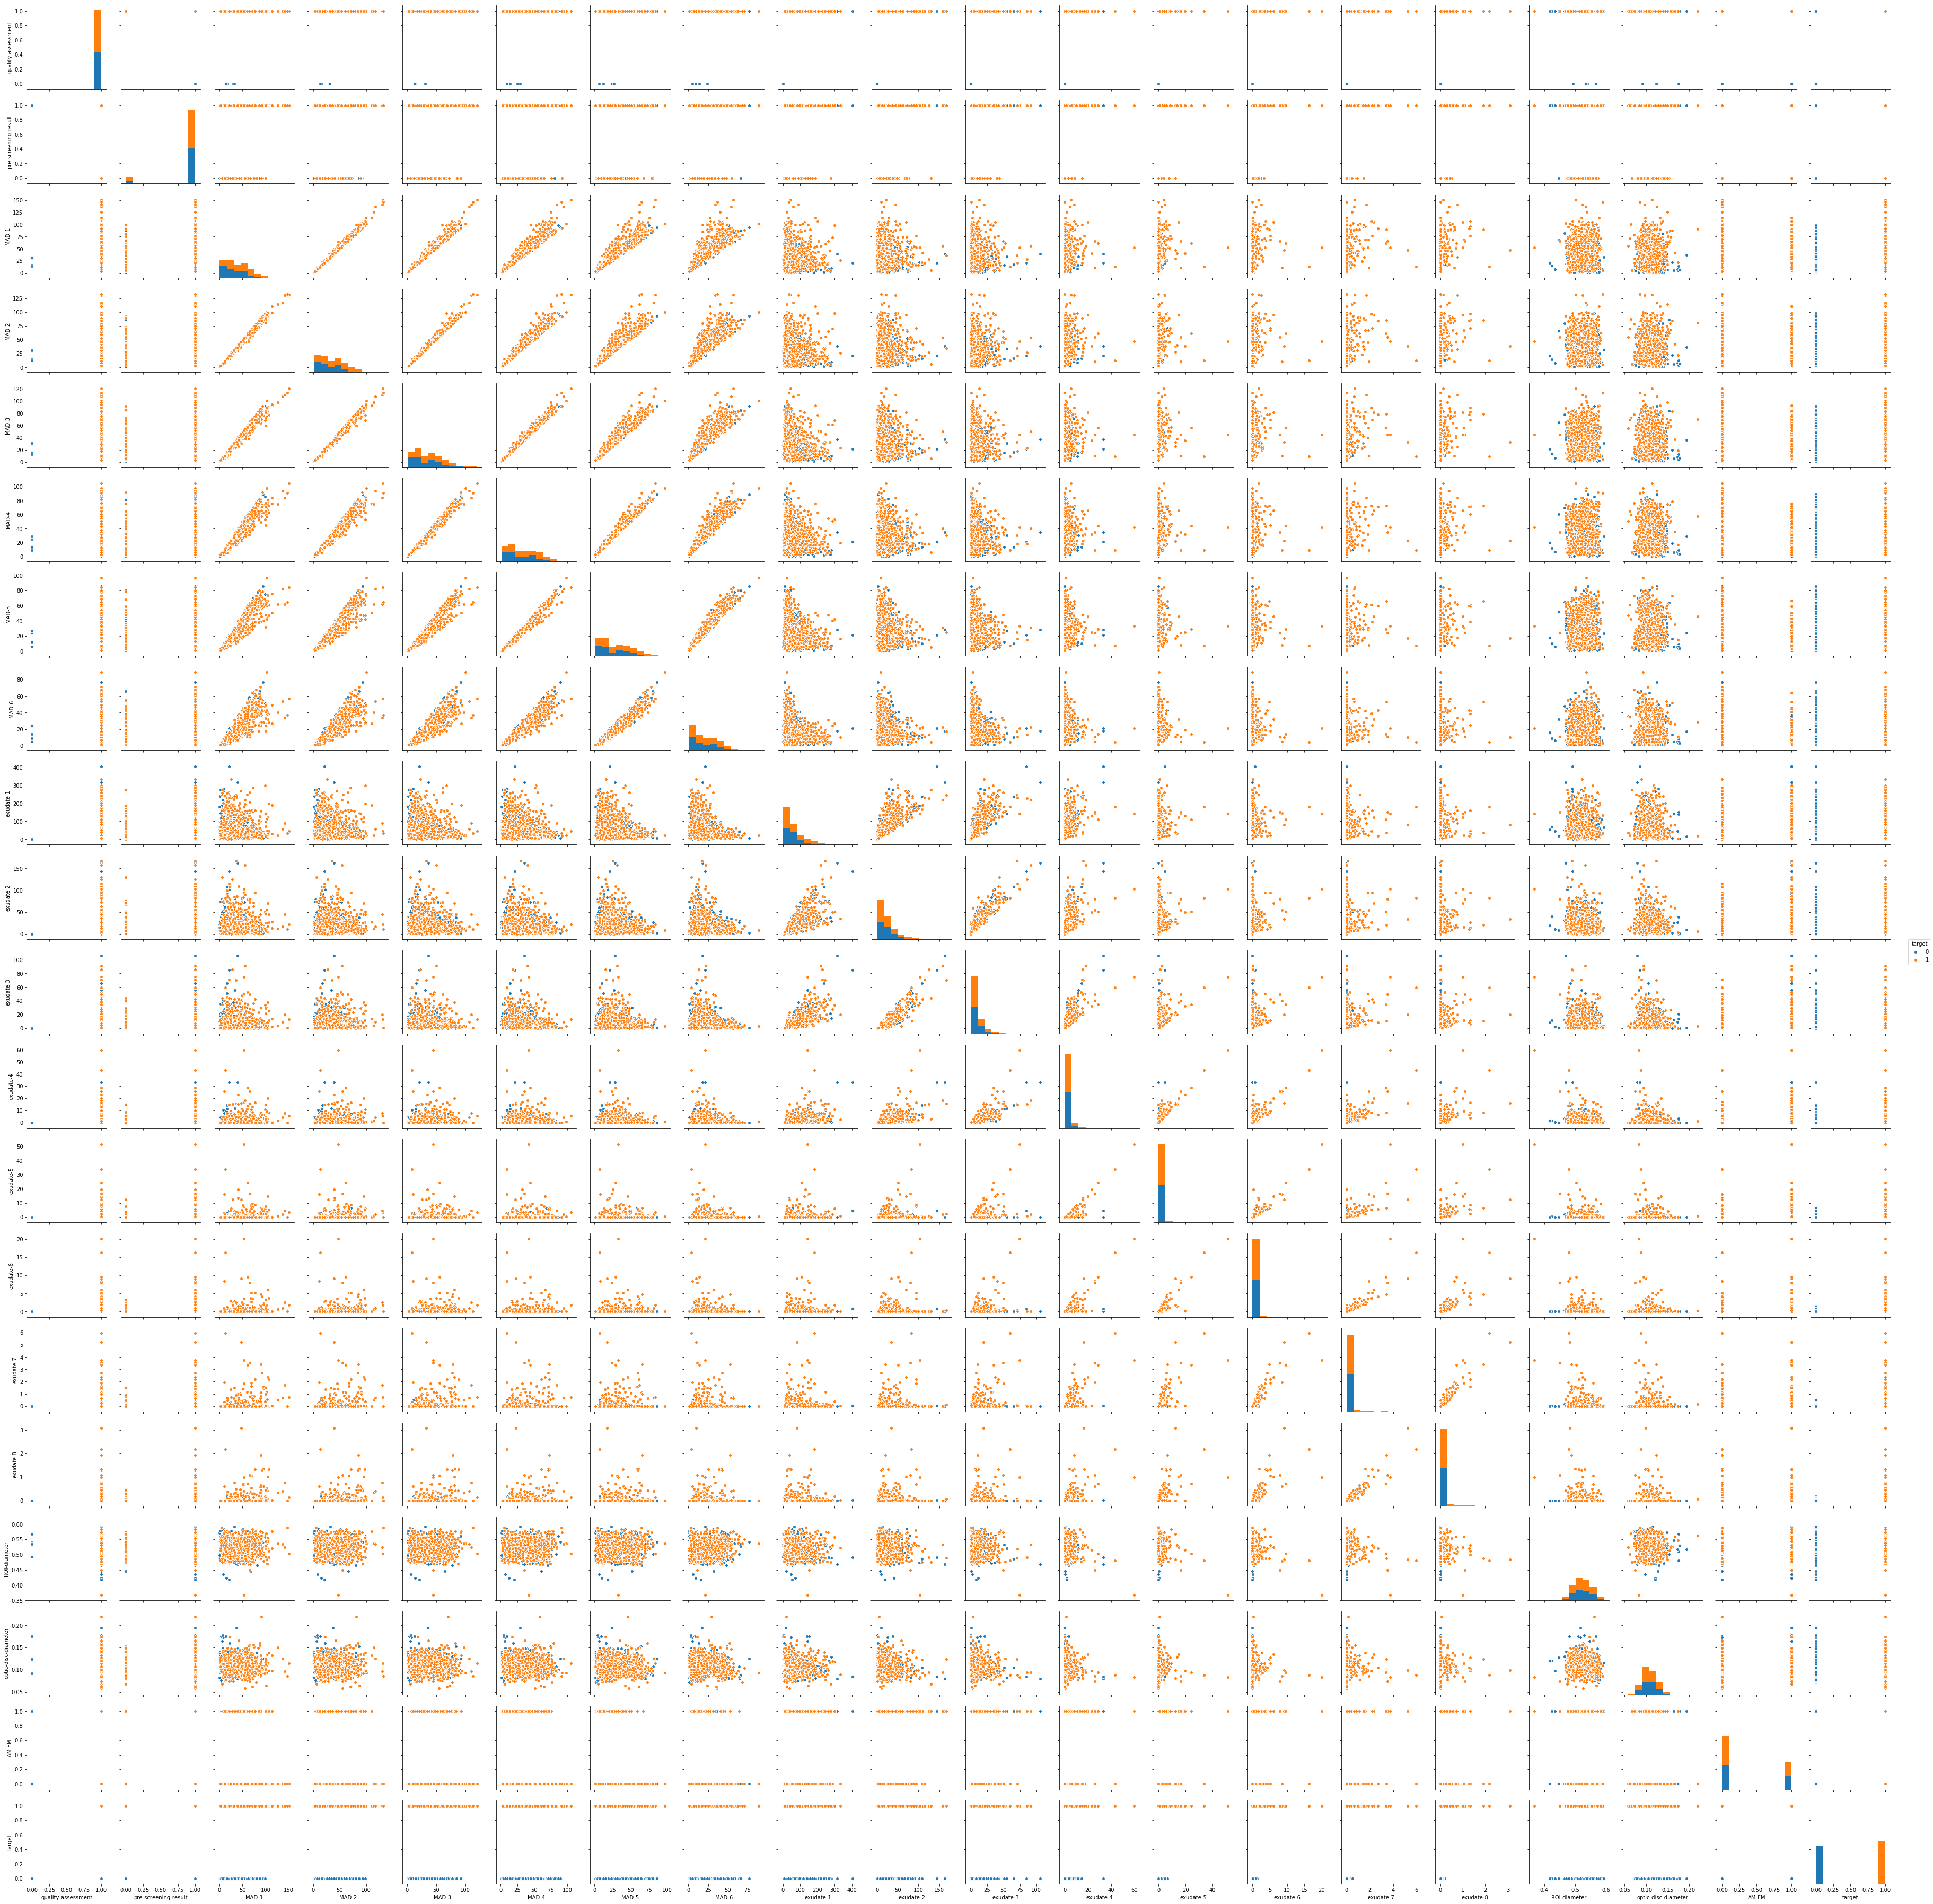

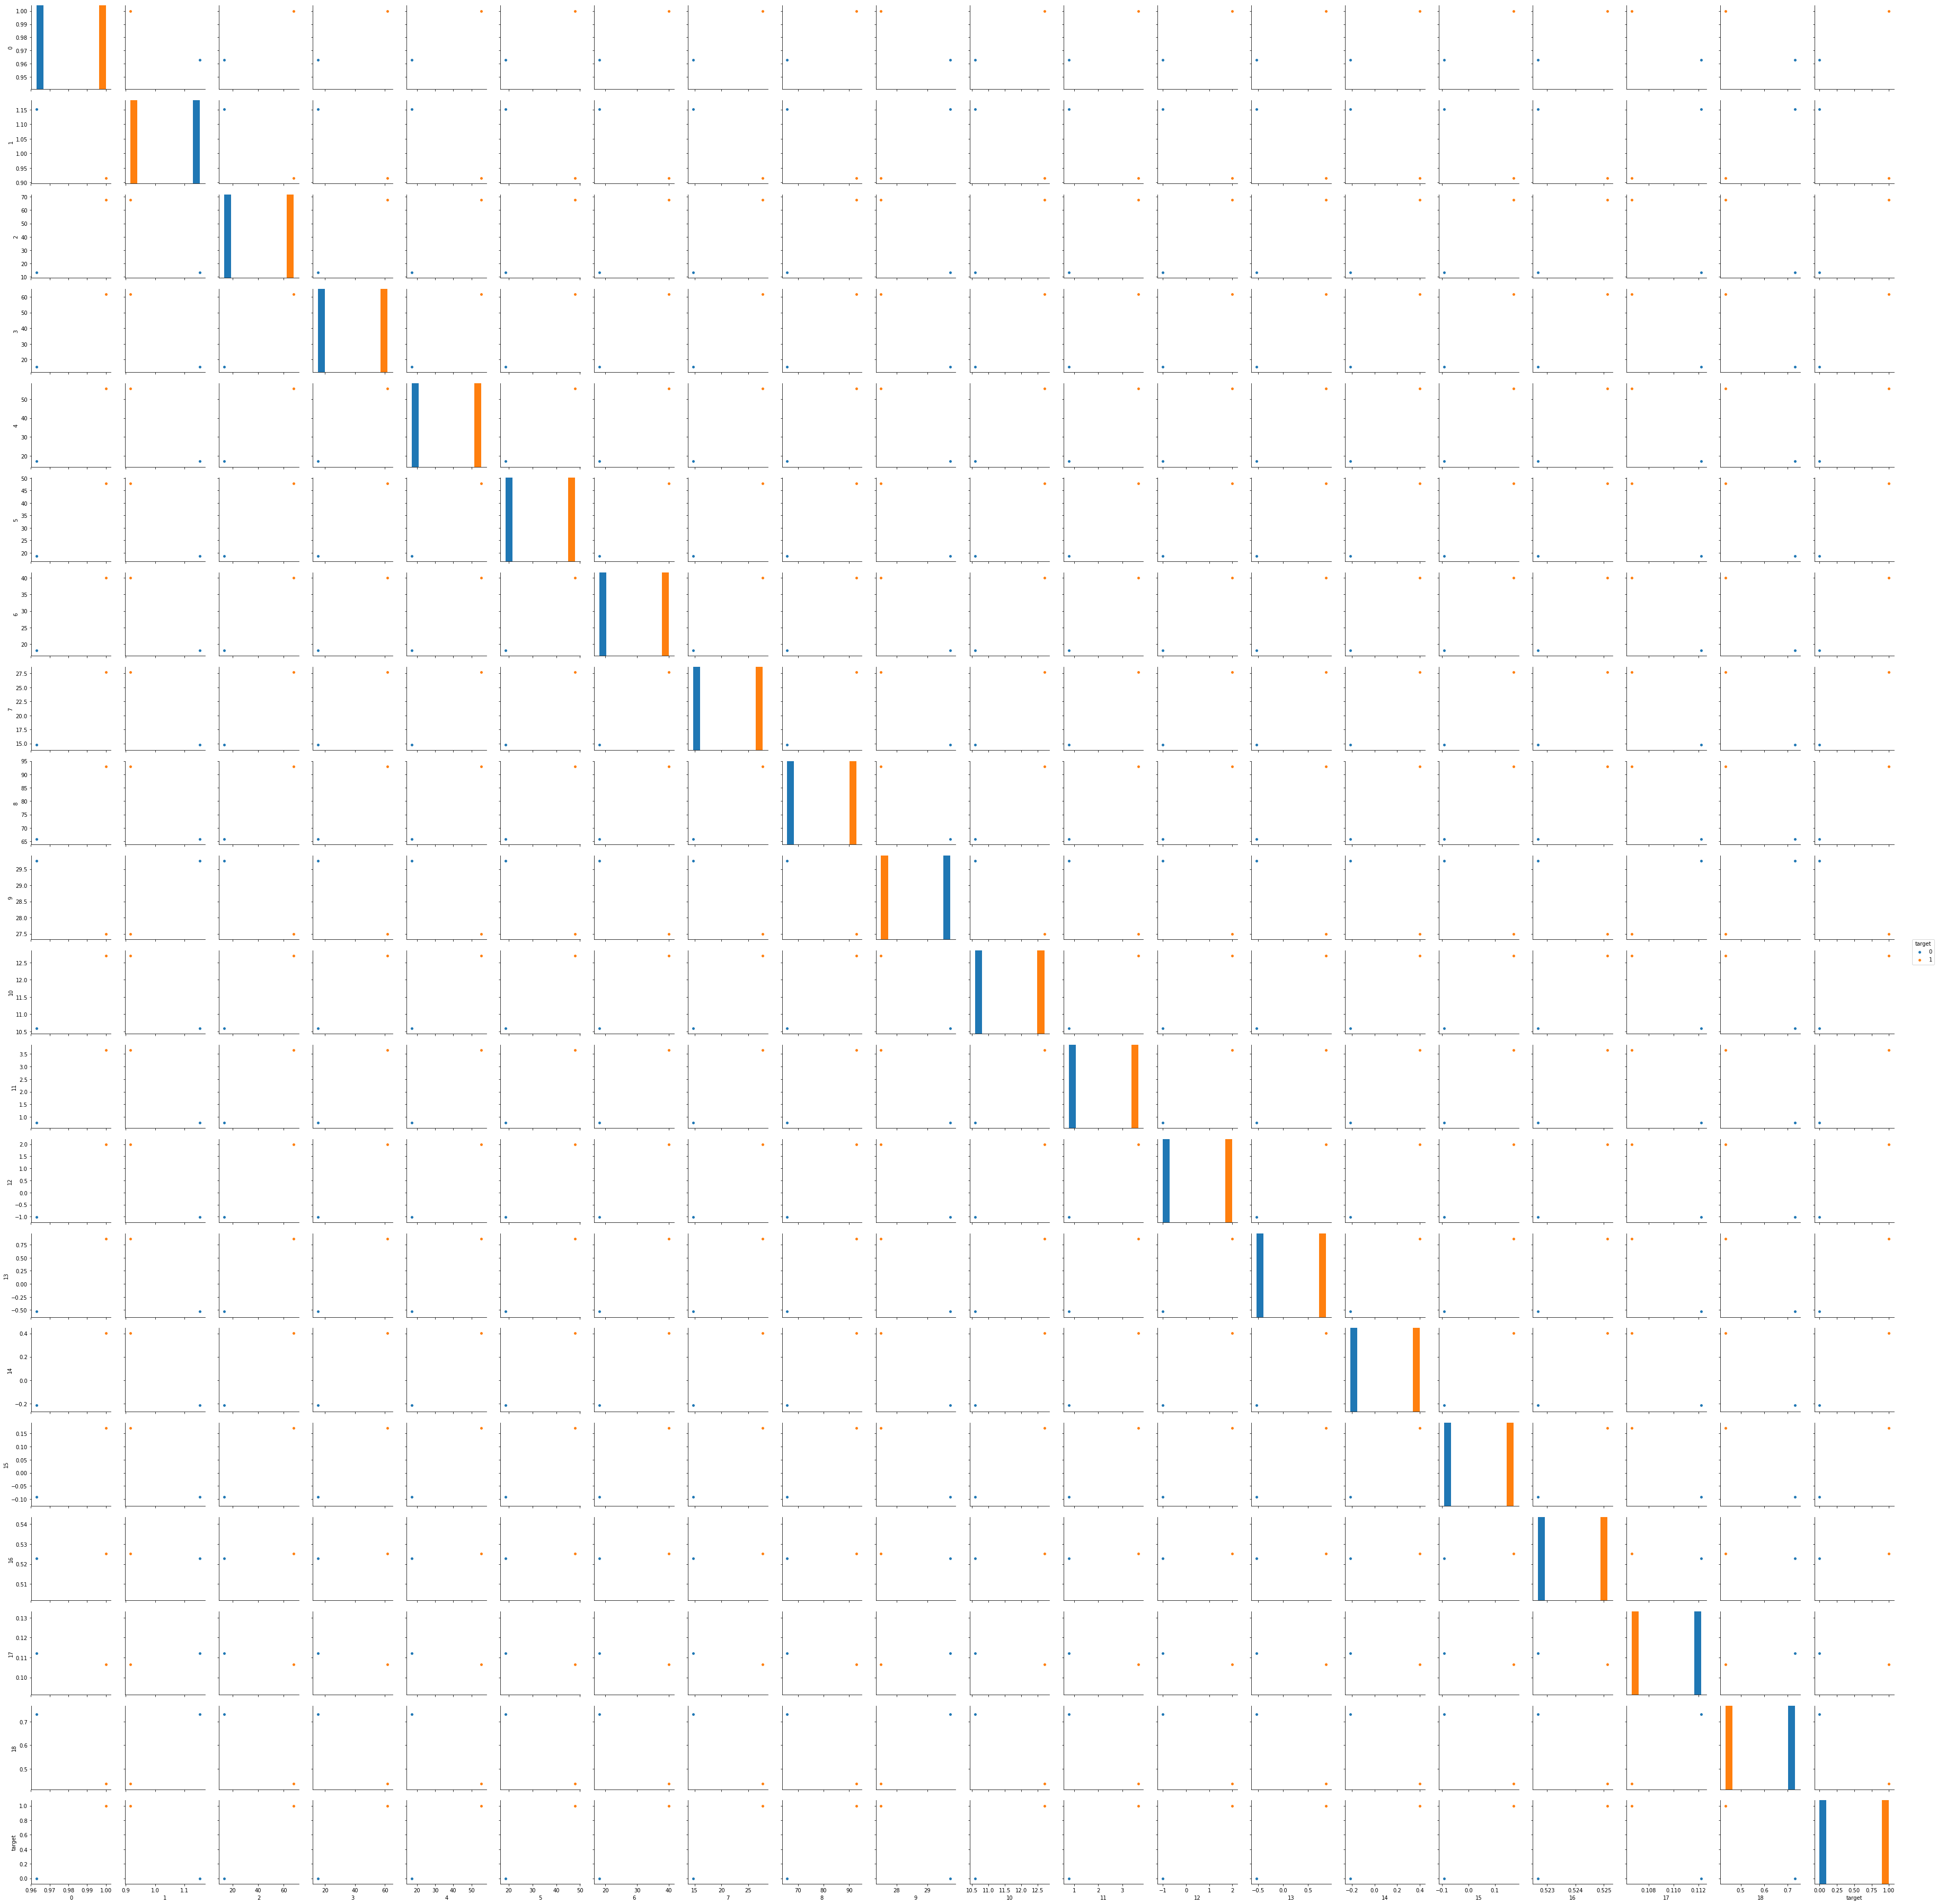

In [35]:
plot_scattermatrix(x_train, y_train)
plot_scattermatrix(data=lvqnet.weight, target=lvqnet.subclass_to_class)
plt.show()

In [30]:
# lvqnet.train(x_test, y_test, epochs=75)
y_pred0 = lvqnet.predict(x_test)
cf0 = confusion_matrix(y_test, y_pred0)
# print(cf0)

fnr0 = cf0[1][0]/(cf0[1][0] + cf0[1][1])
fpr0 = cf0[0][1]/(cf0[0][1] + cf0[0][0])

print("FNR: ", fnr0, " FPR: ", fpr0)

FNR:  0.5546875  FPR:  0.1650485436893204


In [13]:
##### SVM #####

from sklearn.svm import SVC

In [31]:
from sklearn.linear_model import SGDClassifier
from keras import optimizers

# svclassifier = SVC(kernel='rbf')  
# svclassifier = SVC(kernel='poly', degree=8)
svclassifier = SVC(kernel='linear', verbose=True)
# svclassifier = SVC(kernel = 'sigmoid')
svclassifier.fit(x_train, y_train) 

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [32]:
y_pred1 = svclassifier.predict(x_test) 

In [33]:
cf1 = confusion_matrix(y_test, y_pred1)
# print(cf)  
print(classification_report(y_test, y_pred1)) 

accuracy = (cf1[0][0] + cf1[1][1])/(cf1[0][0] + cf1[0][1] + cf1[1][0] + cf1[1][1])
print("Accuracy: ", accuracy)

fnr1 = cf1[1][0]/(cf1[1][0] + cf1[1][1])
fpr1 = cf1[0][1]/(cf1[0][1] + cf1[0][0])

print("FNR: ", fnr1, " FPR: ", fpr1)

             precision    recall  f1-score   support

          0       0.64      0.94      0.76       103
          1       0.93      0.58      0.71       128

avg / total       0.80      0.74      0.73       231

Accuracy:  0.7402597402597403
FNR:  0.421875  FPR:  0.05825242718446602


In [16]:
##### Backpropagation #####

# x_train = pd.DataFrame(data=scaler.transform(x_train), columns = x_train.columns, index = x_train.index)

In [18]:
x_train = nm.array(x_train)
y_train = nm.array(y_train)

In [20]:
# x_test = pd.DataFrame(data=scaler.transform(x_test), columns=x_test.columns, index=x_test.index)

In [19]:
x_test = nm.array(x_test)
y_test = nm.array(y_test)

In [20]:
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

In [21]:
network = models.Sequential()
network.add(layers.Dense(units=19, activation = 'sigmoid', input_shape=(x_train.shape[1],)))
network.add(layers.Dense(units=1))
sgd = optimizers.SGD(lr = 0.001)

In [22]:
network.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])

In [23]:
training = network.fit(x_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
920/920 [==============================] - 0s 187us/step - loss: 0.2975 - acc: 0.5217
Epoch 2/50
920/920 [==============================] - 0s 67us/step - loss: 0.2409 - acc: 0.5652
Epoch 3/50
920/920 [==============================] - 0s 66us/step - loss: 0.2401 - acc: 0.5609
Epoch 4/50
920/920 [==============================] - 0s 67us/step - loss: 0.2378 - acc: 0.5674
Epoch 5/50
920/920 [==============================] - 0s 66us/step - loss: 0.2347 - acc: 0.5859
Epoch 6/50
920/920 [==============================] - 0s 65us/step - loss: 0.2306 - acc: 0.6076
Epoch 7/50
920/920 [==============================] - 0s 66us/step - loss: 0.2277 - acc: 0.6043
Epoch 8/50
920/920 [==============================] - 0s 69us/step - loss: 0.2248 - acc: 0.6152
Epoch 9/50
920/920 [==============================] - 0s 63us/step - loss: 0.2181 - acc: 0.6359
Epoch 10/50
920/920 [==============================] - 0s 66us/step - loss: 0.2256 - acc: 0.6141
Epoch 11/50
920/920 [=================

In [26]:
# network.evaluate(x_test, y_test)
y_pred2 = network.predict(x_test)
cf2 = confusion_matrix(y_test, y_pred2.round())
fnr2 = cf2[1][0]/(cf2[1][0] + cf2[1][1])
fpr2 = cf2[0][1]/(cf2[0][1] + cf2[0][0])

print("FNR: ", fnr2, " FPR: ", fpr2)

FNR:  0.56  FPR:  0.08490566037735849
